In [17]:
import altair as alt
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt

In [18]:
student_names = ['Patrick Dickey', 'Tom Yoxsimer','Cole Bauguess','Kevin Mcdonald','William Landon','Duane Shelton']
student_ids = [800100200, 800100201,800100202,800100203,800100204,800100205]
classes = [16,16,16,16,16,16]
#print(student_names)
#print(student_ids)

In [59]:
students_df = pd.DataFrame(student_names)

students_df.rename(columns = {0:'student_name'}, inplace = True)
students_df['student_id'] = student_ids
students_df['class'] = classes
students_df.to_csv('students_table')
students_df

,student_name,student_id,class
0,Patrick Dickey,800100200,16
1,Tom Yoxsimer,800100201,16
2,Cole Bauguess,800100202,16
3,Kevin Mcdonald,800100203,16
4,William Landon,800100204,16
5,Duane Shelton,800100205,16


In [60]:
club_names = ['Chess Club','Ultimate Frisbee','Archery Club','Alpha Sigma Phi','Rho Tau Sigma', 'Nature Painters', 'Frisbee Golf','Investment Club', 'CAB', 'Mens Soccer']
club_id = [1,2,3,4,5,6,7,8,9,10]
club_size = [50,60,10,120,70,34,47,65,85,120]
activity = [80,90,50,50,40,30,80,32,87,100]
communication = ['https://discord.gg/2DmmD9qm','GroupMe invite','https://discord.gg/2DmyD9qm','https://discord.gg/2DemD9qm','https://discord.gg/2DtmD9qm','https://discord.gg/2DtmD9qm','https://discord.gg/2DtmD9qm','GroupMe invite','GroupMe invite','https://discord.gg/2DemD9qm']
club_df = pd.DataFrame(club_names)
club_df['club_id'] = club_id
club_df['club_size'] = club_size
club_df['activity'] = activity
club_df['communication'] = communication
club_df.rename(columns = {0:'club_name'}, inplace = True)
club_df.to_csv('club_table')
club_df

,club_name,club_id,club_size,activity,communication
0,Chess Club,1,50,80,https://discord.gg/2DmmD9qm
1,Ultimate Frisbee,2,60,90,GroupMe invite
2,Archery Club,3,10,50,https://discord.gg/2DmyD9qm
3,Alpha Sigma Phi,4,120,50,https://discord.gg/2DemD9qm
4,Rho Tau Sigma,5,70,40,https://discord.gg/2DtmD9qm
5,Nature Painters,6,34,30,https://discord.gg/2DtmD9qm
6,Frisbee Golf,7,47,80,https://discord.gg/2DtmD9qm
7,Investment Club,8,65,32,GroupMe invite
8,CAB,9,85,87,GroupMe invite
9,Mens Soccer,10,120,100,https://discord.gg/2DemD9qm


In [39]:
roles = ['President','Captain', 'Vice President', 'Officer', 'Treasurer','President']
membership_df = pd.DataFrame(roles)
membership_df['club_id'] = [1,2,3,4,5,4]
membership_df['student_id'] = student_ids
membership_df.rename(columns = {0:'role'}, inplace = True)
membership_df.to_csv('membership_table')
membership_df

,role,club_id,student_id
0,President,1,800100200
1,Captain,2,800100201
2,Vice President,3,800100202
3,Officer,4,800100203
4,Treasurer,5,800100204
5,President,4,800100205


In [66]:
# Join club
# Inputs required: student_id, club_id, role (default = member)
student_id = 800100200
club_id = 3
role = 'Member'
def join_club(student_id, club_id, role):
    membership_df.loc[len(membership_df.index)] = [role, club_id, student_id]
    print(membership_df)
    club_df.loc[club_df['club_id'] == club_id, ['club_size']] += 1
    
    
#membership_df = membership_df.iloc[:-1, :]
join_club(800100200, 3, 'Member')
join_club(800100207, 2, 'Member')
club_df.to_csv('club_table')

             role  club_id  student_id
0       President        1   800100200
1         Captain        2   800100201
2  Vice President        3   800100202
3         Officer        4   800100203
4       Treasurer        5   800100204
5       President        4   800100205
6          Member        3   800100200
             role  club_id  student_id
0       President        1   800100200
1         Captain        2   800100201
2  Vice President        3   800100202
3         Officer        4   800100203
4       Treasurer        5   800100204
5       President        4   800100205
6          Member        3   800100200
7          Member        2   800100207


In [67]:
# Add new user
# Inputs required: student_id, student_name
student_name = 'Luke Keuchly'
student_id = '800100207'
def add_user(student_name, student_id, grade):
    students_df.loc[len(membership_df.index)] = [student_name, student_id, grade]
    print(students_df)
#students_df = students_df.iloc[:-1, :]
add_user('Luke Keuchly', '800100207', 14)
club_df.to_csv('students_table')

     student_name student_id  class
0  Patrick Dickey  800100200     16
1    Tom Yoxsimer  800100201     16
2   Cole Bauguess  800100202     16
3  Kevin Mcdonald  800100203     16
4  William Landon  800100204     16
5   Duane Shelton  800100205     16
8    Luke Keuchly  800100207     14


In [72]:
# Show clubs
# Inputs required: student_id
df = pd.DataFrame()
student_id = 800100200
clubs = pd.DataFrame()
club_ids = []
def showclubs(student_id):
    clubs = pd.DataFrame()
    df = membership_df[membership_df['student_id'] == student_id]

    for x in df['club_id']: 
        data = club_df[club_df['club_id'] == x]
        clubs = clubs.append(data)
    print(clubs)
    return(clubs)
new_df = showclubs(800100200)
new_df.to_csv('user_membership')

      club_name  club_id  club_size  activity                communication
0    Chess Club        1         50        80  https://discord.gg/2DmmD9qm
2  Archery Club        3         12        50  https://discord.gg/2DmyD9qm


In [76]:
# Search for club
# Inputs required: club_name
club_name = 'Chess club'
def club_search(club_name):
    clubs = []
    club_name = club_name.lower()
    for x in club_df['club_name'].str.lower():
        if x.startswith(club_name):
            clubs.append(x)
    print(clubs)
    return(clubs)
club_search('a')

['archery club', 'alpha sigma phi']


['archery club', 'alpha sigma phi']

In [79]:
# Display clubs based on criteria
# Inputs required: any attribute of club
def club_slicer(min,max,attribute,slice_number=1,min2=0,max2=0,attribute2=''):
    club_slice = club_df[club_df[attribute] > min]
    club_slice = club_slice[club_slice[attribute] < max]
    #print(club_slice)
    if slice_number == 2:
        club_slice = club_slice[club_slice[attribute2]>min2]
        club_slice = club_slice[club_slice[attribute2]<max2]
    #print(club_slice)
    return club_slice
results = club_slicer(20,71,'club_size',2,20,90,'activity')
#club_slicer(50,150,'club_size')
#club_slicer(80,100,'activity')
results.to_csv('filtered_results')
results

,club_name,club_id,club_size,activity,communication
0,Chess Club,1,50,80,https://discord.gg/2DmmD9qm
4,Rho Tau Sigma,5,70,40,https://discord.gg/2DtmD9qm
5,Nature Painters,6,34,30,https://discord.gg/2DtmD9qm
6,Frisbee Golf,7,47,80,https://discord.gg/2DtmD9qm
7,Investment Club,8,65,32,GroupMe invite


In [80]:
# Activity Rankings
# Inputs required: activity
club_df_sorted = club_df.sort_values('activity', ascending=False)
club_df_sorted.to_csv('sorted_results')
club_df_sorted

,club_name,club_id,club_size,activity,communication
9,Mens Soccer,10,120,100,https://discord.gg/2DemD9qm
1,Ultimate Frisbee,2,62,90,GroupMe invite
8,CAB,9,85,87,GroupMe invite
0,Chess Club,1,50,80,https://discord.gg/2DmmD9qm
6,Frisbee Golf,7,47,80,https://discord.gg/2DtmD9qm
2,Archery Club,3,12,50,https://discord.gg/2DmyD9qm
3,Alpha Sigma Phi,4,120,50,https://discord.gg/2DemD9qm
4,Rho Tau Sigma,5,70,40,https://discord.gg/2DtmD9qm
7,Investment Club,8,65,32,GroupMe invite
5,Nature Painters,6,34,30,https://discord.gg/2DtmD9qm


([<matplotlib.patches.Wedge at 0x200ffad2160>,
 [Text(6.735557395310444e-17, 1.1, ''),
  Text(-2.0206672185931328e-16, -1.1, '')])

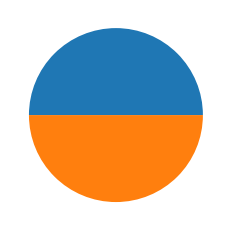

In [81]:
# Graph of class standings for club
# Inputs required: club_id
def class_breakdown_pie(club_id):
    club_id = 2
    students = []
    club_data = membership_df[membership_df['club_id'] == club_id]
    club_data
    student_ids = club_data['student_id']
    student_ids
    for x in student_ids:
        students.append(x)
    #print(students)
    bar_graph = plt.pie(students)
    return(bar_graph)
class_breakdown_pie(2)

In [29]:
# Next function
# Inputs required:
